# Cubic Spline Interpolation for Denoising Images

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.ndimage import gaussian_filter
from skimage import color, data, io

In [4]:
def add_gaussian_noise(image, sigma):
    """Add Gaussian noise to an image."""
    noise = np.random.normal(0, sigma, image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 1)

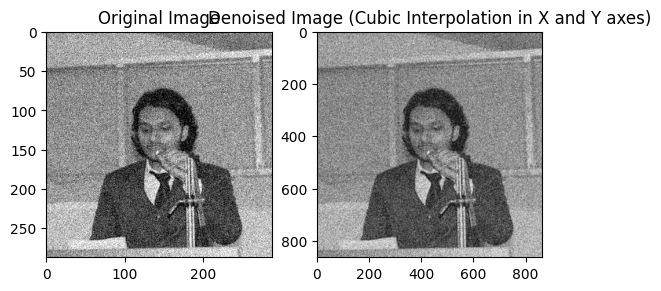

In [5]:
# Load the image
image_path = "/content/unnamed.jpg"
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)
gray_image = add_gaussian_noise(gray_image, .1)
# Get the dimensions of the image
rows, cols = gray_image.shape

# Define the x and y values
x = np.arange(cols)
# y = np.arange(rows)

# Initialize an array to store the denoised image
denoised_image = np.zeros([rows, cols*3])

# Perform cubic spline interpolation along the X-axis for each row
for row in range(rows):
    y_values = gray_image[row, :]
    cs_x = CubicSpline(x, y_values)



    new_x = np.linspace(0, cols - 1, cols * 3)

    # Interpolate the column
    interpolated_column = cs_x(new_x)

    # Update the interpolated image with the denoised column
    denoised_image[row, :] = interpolated_column

# Perform cubic spline interpolation along the Y-axis for each column
denoised_image_final = np.zeros([rows*3, cols*3])
rows, cols = denoised_image.shape
x = np.arange(cols)
y = np.arange(rows)

for col in range(cols):
    x_values = denoised_image[:, col]
    cs_y = CubicSpline(y, x_values)

    new_y = np.linspace(0, rows - 1, rows * 3)

    # Interpolate the column
    interpolated_column = cs_y(new_y)

    # Update the interpolated image with the denoised column
    # interpolated_image[:, col] = interpolated_column


    denoised_image_final[:, col] = interpolated_column

# Display the original and denoised images
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image_final, cmap='gray')
plt.title('Denoised Image (Cubic Interpolation in X and Y axes)')

plt.show()
